In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import riskkit as erk
import scipy.stats as stats
from scipy.stats.mstats import gmean

## Efficient Frontier II

In [21]:
ind = erk.get_ind_returns()
indp = ind['1996':'2000']

er = erk.annualize_rets(indp, 12)
cov = indp.cov()

In [3]:
def portfolio_return(w, rets):
    return w.T @ rets
def portfolio_vol(w, cov):
    return (w.T @ cov @ w)**.5

In [4]:
l = ['Food', 'Beer', 'Smoke', 'Coal']
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [5]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [6]:
w = np.repeat(1/4, 4)
erk.portfolio_return(w, er[l])

0.19511097196038413

In [7]:
erk.portfolio_vol(w, cov.loc[l, l])

0.055059195776437045

CPU times: user 5.39 s, sys: 88.7 ms, total: 5.47 s
Wall time: 4.98 s


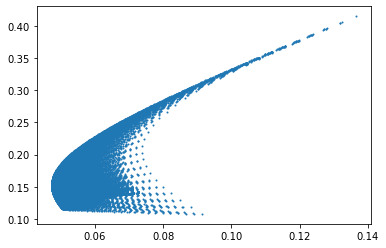

In [14]:
%%time
l = ['Food', 'Beer', 'Smoke', 'Coal']
ret = erk.annualize_rets(indp, 12)[l]
cov = indp.cov().loc[l, l]

# n = 30 takes 5s
n = 30
rets = []
vols = []
for i1 in np.linspace(0, 1, n):
    for i2 in np.linspace(0, 1 - i1, n):
        for i3 in np.linspace(0, 1 - i1 - i2, n):
            i4 = 1 - i1 - i2 - i3
            w = np.array([i1, i2, i3, i4])
            rets.append(erk.portfolio_return(w, ret))
            vols.append(erk.portfolio_vol(w, cov))
plt.scatter(vols, rets, s=1)
    

## 2 Asset Frontier

<AxesSubplot:xlabel='Vol', ylabel='R'>

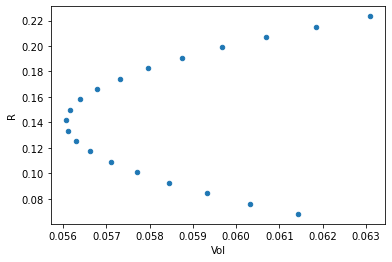

In [24]:
l = ['Games', 'Fin']

n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l, l]) for w in weights]
ef = pd.DataFrame({'R': rets, 'Vol': vols})
ef.plot.scatter(x='Vol', y='R')

<AxesSubplot:xlabel='Volatility'>

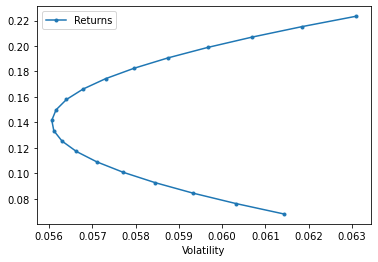

In [59]:
erk.plot_ef2(20, er[l], cov.loc[l, l])

<AxesSubplot:xlabel='Volatility'>

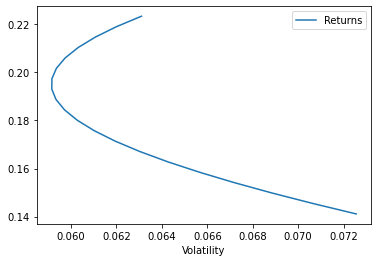

In [63]:
l = ['Fin', 'Beer']
erk.plot_ef2(20, er[l], cov.loc[l, l], style='-')